Enter the amplitude of the analog signal: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


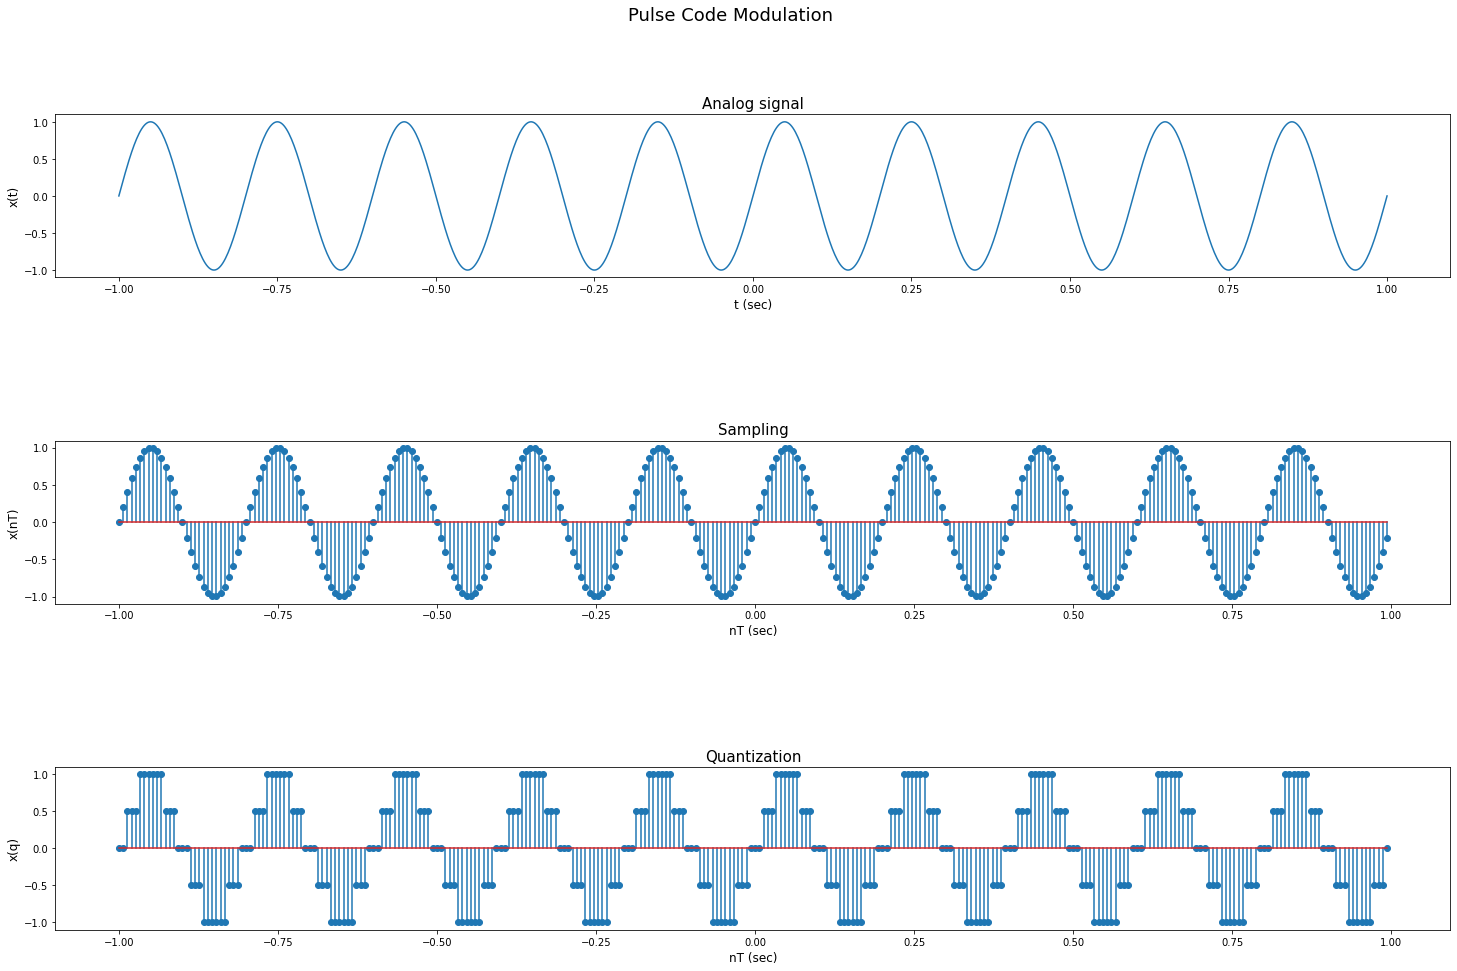

In [12]:
"""

Reg: 2017331101
Name: Asif Idris Tuhin

"""
"""
In this task I have covered the following subtasks: 
In this cell:
1.plotting an analog signal
2.Sampling that analog signal
3.Quantizing .

In the next cell:
4.Encoding .
5.plotting Digital signal generated from the analog signal.

Thus this program simulates the analog-digital signal using Pulse Code Modulation technique.
"""


import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math
import itertools

#analog signal
# a=2.0 #Amplitude of the analog signal
inp=input("Enter the amplitude of the analog signal: ")
a=int(inp)

# inp1=input("Enter the frequency of the analog signal: ")
# f=int(inp1)

f=5.0 #Frequency of the analog signal


d= -np.pi/2.0 #Phase of the analog signal


lim=1.0
t= np.linspace(-lim,lim,1000) # time/x axis

x_t=a*np.cos(2.0*np.pi*f*t + d) #analog signal





#sampling
Fs= 150.0 # sampling frequency
T=1.0 /Fs
nT= np.arange(-lim,lim,T) 
x_nT=a*np.cos(2.0*np.pi*f*nT + d) # signal

#quantizing
# level=input("How many levels you want in quantizing?:2/4/8/16... .Remember More levels need more sampling frequency(Fs) :  ")
# level=int(level)
# bits=math.log2(level)
bits=2 # bits per level
levels= 2 ** (bits-1) #x axis er 1 side 2ta arek side e 2ta. level= 2^bits=2^2=4 but i took 2^bits-1 only for calculation purpose
step=a/levels # delta bolte pari
xq_n=np.round(x_nT/step)*step # digital signal


#plot
plt.figure(figsize=(25,15))
plt.suptitle("Pulse Code Modulation",fontsize=18)



plt.subplot(3,1,1)
plt.plot(t,x_t)
plt.title("Analog signal",fontsize=15)
plt.xlabel("t (sec)",fontsize=12)
plt.ylabel("x(t)",fontsize=12)
#plt.stem(t,x_t)


plt.subplot(3,1,2)
#plt.plot(nT,x_nT)
plt.stem(nT,x_nT)
plt.title("Sampling",fontsize=15)
plt.xlabel("nT (sec)",fontsize=12)
plt.ylabel("x(nT)",fontsize=12)


plt.subplot(3 ,1, 3)
plt.stem(nT,xq_n)
# plt.plot(nT,xq_n)
plt.title("Quantization",fontsize=15)
plt.xlabel("nT (sec)",fontsize=12)
plt.ylabel("x(q)",fontsize=12)


plt.subplots_adjust(hspace=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


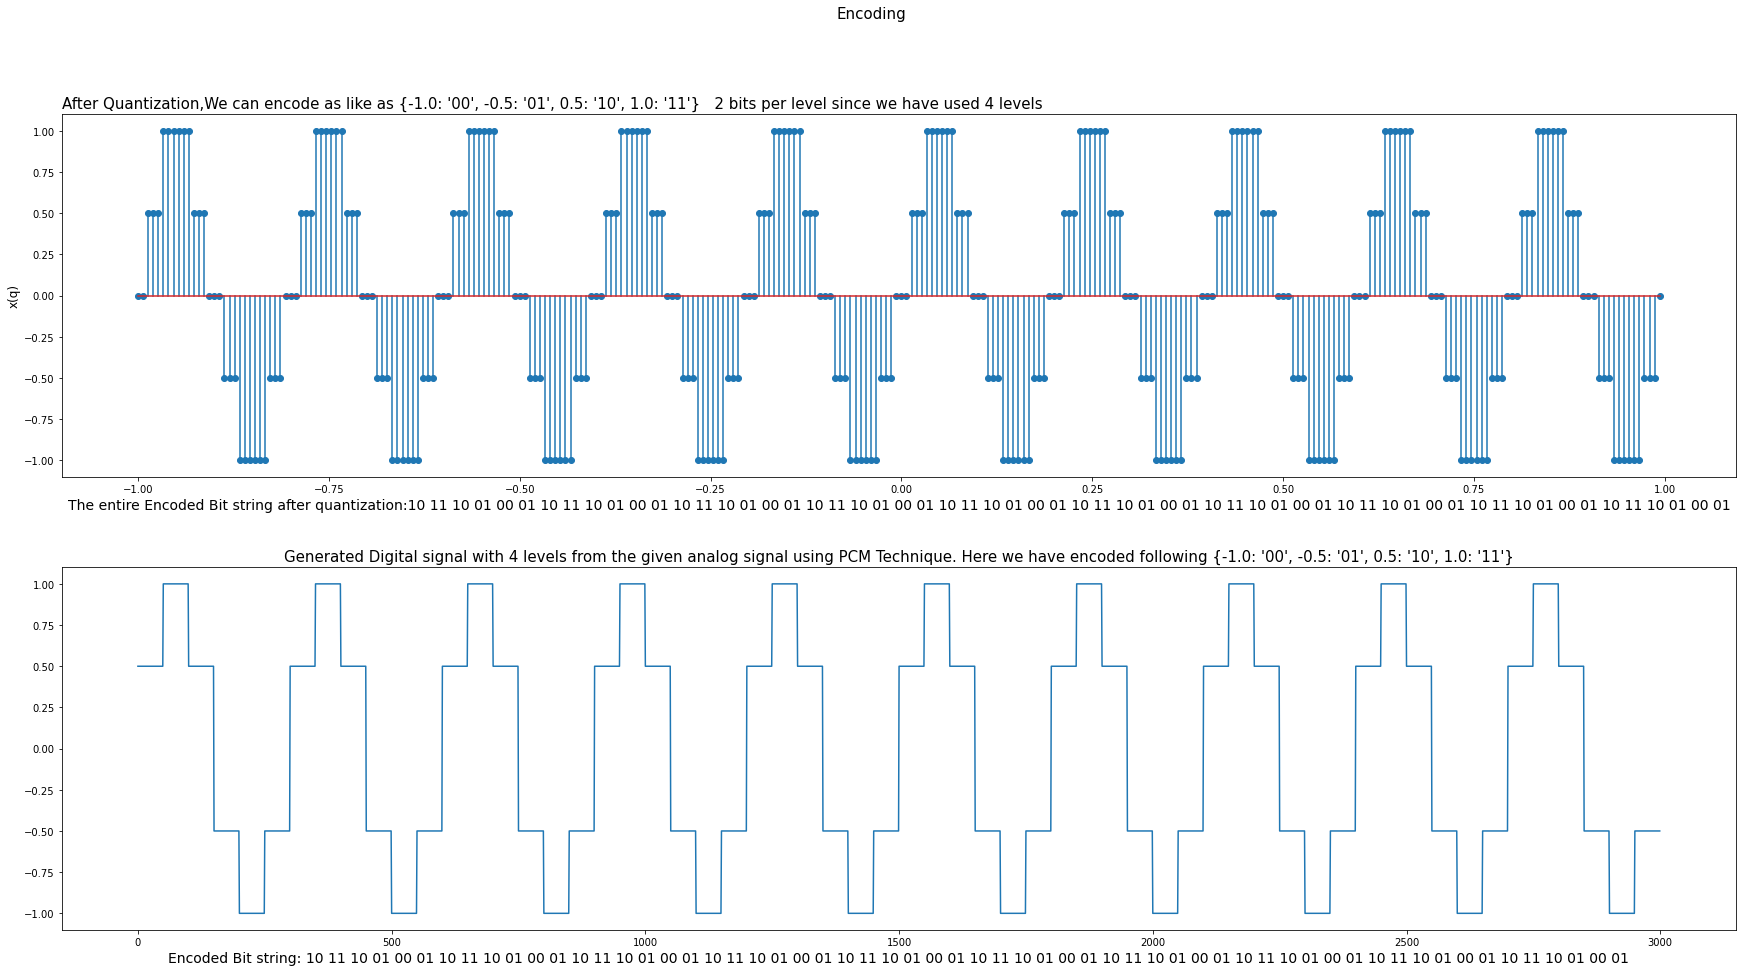

In [13]:
#Encoding


a=set(xq_n)
# print(a)
# print(len(a))
li=[] # level gular y axis er value gula. 0 k kono level dhorchi na.
li=list(a)
del(li[0])
li.sort()
# print(li) #level gula print korlarm

lb=int(math.log2(len(li)))
# print(lb) # proti level e koybit sheta.
bs=["".join(seq) for seq in itertools.product("01", repeat=lb)] # generate all possible binary sequence of length lb
# print(bs)

dt={}
for i in range(0,len(li)):
  dt[li[i]]=bs[i] #ekhane out of index dekhale sampling frequency Fs barate hbe.karon tokhon level jotogula pawar kotha er cheye kom pawa jay.

# print(dt) #kon level er jonno kon bit eta done.

mp=dt
mp=str(dt)
# print(mp)
# print(type(mp))


encd=[] #eta te total bit string ta rakhbo xq_n dekhe dekhe
for i,j in enumerate(xq_n):
  if xq_n[i]==xq_n[i-1] or xq_n[i]==0:
    continue
  else:
    encd.append(dt[j])

# print(encd)
# print(type(encd))
# print(type(encd[1]))



space_separated = " ".join(encd)
# print(space_separated) # pura bit string ta print korlam space diye.remember encd list e protita element 1ta string.eke int e convert kore arekta list banate hbe for ploting digital signal
# space_separated=int(space_separated)
# print(type(space_separated))

encd_int=[] # encd list er element gula string chilo ogulake int e convert kore ei encd_int list e rakhbo for plotting purpose
for j in encd:
  # print(j)
  encd_int.append(int(j))

# print(encd_int)
# print(len(encd))
# print(len(encd_int))


sym_len=50
ensig=[]
for i,j in enumerate(xq_n):
    if xq_n[i]==xq_n[i-1] or xq_n[i]==0:
      continue
    for k in range(0,sym_len):
      ensig.append(j)


# print(len(encd))
# print(len(encd_int))
# print(len(ensig))



# print("The Generated Bit string: ",space_separated) # emne print korlam pura bit string .title/xlabel e print korle ate na tai choto hoye jay.
plt.figure(figsize=(30,15))
plt.suptitle("Encoding",fontsize=15)
plt.subplot(2,1,1)
plt.stem(nT,xq_n)
plt.title("After Quantization,We can encode as like as " + mp +"   {lbb} bits per level since we have used {levels} levels".format(lbb=lb,levels=len(li)) , loc="left"  ,fontsize=15)
plt.xlabel("The entire Encoded Bit string after quantization:" + space_separated,fontsize=14)
plt.ylabel("x(q)",fontsize=12)


plt.subplot(2,1,2)
plt.plot(ensig)
plt.title("Generated Digital signal with {levels} levels from the given analog signal using PCM Technique.".format(levels=len(li)) + " Here we have encoded following " + mp  ,fontsize=15)
plt.xlabel("Encoded Bit string: " + space_separated,fontsize=14)



plt.subplots_adjust(hspace=0.25)